# Bias & Variance

<img src="figures/bias-variance.png" alt="bias-variance" style="width: 1400px;"/>

to know if your model suffer from high bias or high variance is to compare the training error with the validation set error.

##  Bias & variance correction


If your algorithm has a high bias, you should conseder the following :
* `Try to make your model more complex (bigger NN for example: size of hidden units, number of layers)`
* `Add more features if possible`
* `Try a different model that is suitable for your data.`
* `Train your model longer.`

On the other hand, if your algorithm has a high variance, you can:
* `Get more data.`
* `Use regularization.`
* `Try a different model that is suitable for your data.`

<img src="figures/bias-variance-tradeoff.jpeg" alt="bias-variance" style="height: 1000px; width: 1700px; "/>

# Regularization

We see that even though the fitted curve passes through the data perfectly, we would not expect this to be a very good predictor. This is a problem of **overfitting**.
 
<img src="figures/reg_example.png" alt="reg-example" style="width: 700px;"/>
  
If we have overfitting from our hypothesis function, we can reduce the weight that some of the terms in our function carry by increasing their corresponding cost.
  

 
We could also **regularize** all of our $w$ parameters in a single summation as:

\begin{equation}
\min_{w} \dfrac {1}{2m} \sum _{i=1}^m \left (h_w (x_{i}) - y_{i} \right)^2 + \lambda \sum_{j=1}^n w_j^2
\end{equation}

 
The $\lambda$, or lambda, is the **regularization parameter**. It determines how much the costs of our $w$ parameters are inflated.

Using the above cost function with the extra summation, we can smooth the output of our hypothesis function to reduce overfitting. **If $\lambda$ is chosen to be too large**, it may smooth out the function too much and cause **underfitting**. 

There are many other regularization techniques include: 

* Early Stopping
* Parameter Norm Penalties 
    * L1 regularization
    * L2 regularization
    * Max-norm regularization
    * Dropout regularization
* Dataset Augmentation
* Noise Robustness (Dropout..)
* ...

In [1]:
import numpy as np
import os
import tensorflow as tf
import sklearn
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.datasets import load_iris
from tensorflow.keras import models, layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from tensorflow.keras.regularizers import l1, l2

In [2]:
from sklearn.datasets import make_moons

X_moon, y_moon = make_moons(n_samples=550, noise=0.35, random_state=1)
encoder = OneHotEncoder(sparse=False)

y_moon = encoder.fit_transform(y_moon.reshape(-1, 1))
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_moon, y_moon,test_size=0.33, random_state=42)

In [3]:
y_moon

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [27]:
def tune_model(
                X_train_m = X_train_m, X_test_m = X_test_m, 
                y_train_m = y_train_m, y_test_m= y_test_m,
                dense_layers = 1,dense_units =100 , activation_t = 'relu', batch=12, 
                regularizer_t = None, lamd = 0.01 , drop = 0 , norm = 0):
    
    if regularizer_t != None:
        regularizer_t = regularizer_t(lamd)
    
    model = models.Sequential()

    model.add(layers.Dense(dense_units, input_shape=(2,), activation=activation_t, kernel_regularizer = regularizer_t))

    for _ in range(dense_layers):

        if drop != 0 :
            model.add(layers.Dropout(drop))
        if norm:
            model.add(layers.BatchNormalization())    
        
        model.add(layers.Dense(dense_units, activation= activation_t ))
    
    if drop != 0 :
            model.add(layers.Dropout(drop))
    if norm:
            model.add(layers.BatchNormalization())  
    

    model.add(layers.Dense(2, activation="softmax"))

    model.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
    
    history = model.fit(X_train_m, y_train_m, validation_data =  [X_test_m, y_test_m] , batch_size=batch, epochs=100, verbose=0)
    return history, model

In [40]:
def plot_moon(model, X_moon= X_moon, y_moon = y_moon, scaler= None):
    '''
    plotting the reults of dnn model with moon dataset 
    '''
    X = X_moon
    y = np.argmax(y_moon , axis = 1)
    axes = [-2, 2, -2, 2]

    x0, x1 = np.meshgrid(
            np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
            np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
        )

    X_new = np.c_[x0.ravel(), x1.ravel()]
    if scaler != None:
        X_new = scaler.transform(X_new)
    
    y_predict = np.argmax(model.predict(X_new), axis = 1)
    zz = y_predict.reshape(x0.shape)

    #plt.figure(figsize=(10, 4))
    plt.plot(X[y==0, 0], X[y==0, 1], "bs")
    plt.plot(X[y==1, 0], X[y==1, 1], "yo")

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

    plt.contourf(x0, x1, zz, cmap=custom_cmap)
    plt.axis(axes)

## **Regularization techniques**


$$ J(w_0,w_1)\ =\ \frac{1}{2m}\sum_{i=1}^m (w_0+w_1x_i-y_i)^2 + P(\lambda,w)$$

We have different types of regularization techniques to overcome this problem. 

### L2 Regularization

With L2 Regularization, the loss function is augmented in such a way that we not only minimize the sum of squared residuals but also penalize the size of parameter estimates, in order to shrink them towards zero:

$$ J(w)\ =\ \frac{1}{2m}\sum_{i=1}^m (h(x_i)-y_i)^2 +\ \lambda\sum_{j=1}^nw_j^2$$

Here if you notice, we come across an extra term, which is known as the penalty term. By changing the values of $\lambda$ (the regularization coefficient), we are basically controlling the penalty term. Higher the values of $\lambda$, bigger is the penalty and therefore the magnitude of coefficients are reduced.


### L1 Regularization


The mathematics behind L1 regularization is quite similar to that of L2. The only difference being instead of adding squares of $w$, we will add the absolute value of $w$.

$$ J(w)\ =\ \frac{1}{2m}\sum_{i=1}^m (h(x_i)-y_i)^2 +\ \lambda\sum_{j=1}^n|w_j|$$

* It is generally used when we have a high number of features, because it automatically does feature selection.


<img src="figures/Ridge_vs_Lasso_Regression.png" alt="Ridge_vs_Lasso_Regularization" style="width: 1200px;"/>

3125/3125 [==============================] - 2s 599us/step


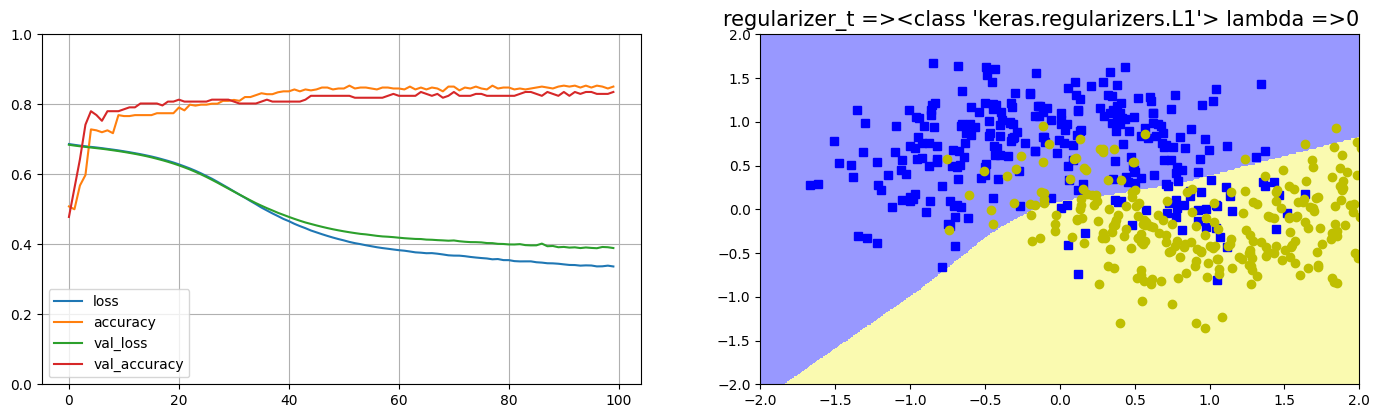

3125/3125 [==============================] - 3s 746us/step


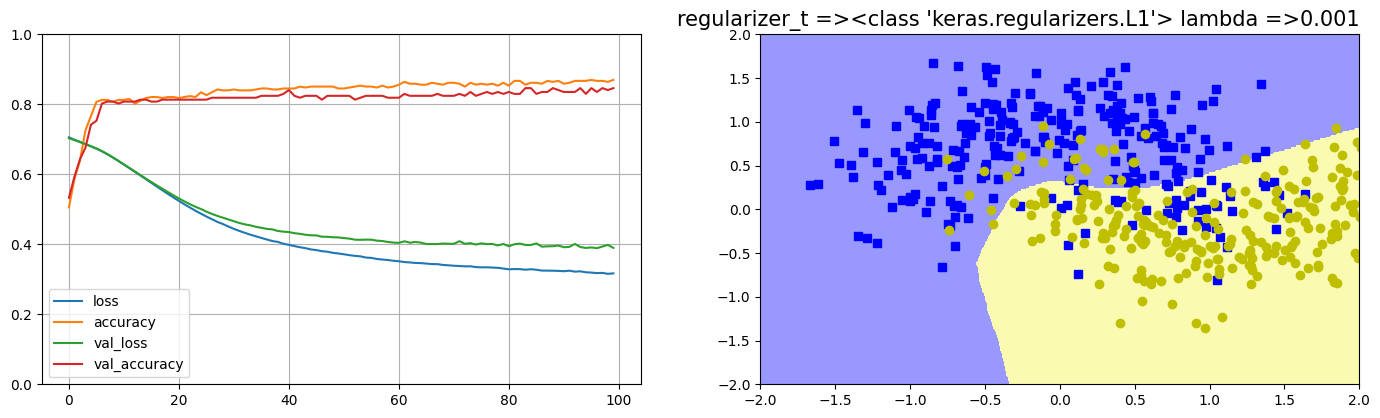

3125/3125 [==============================] - 3s 780us/step


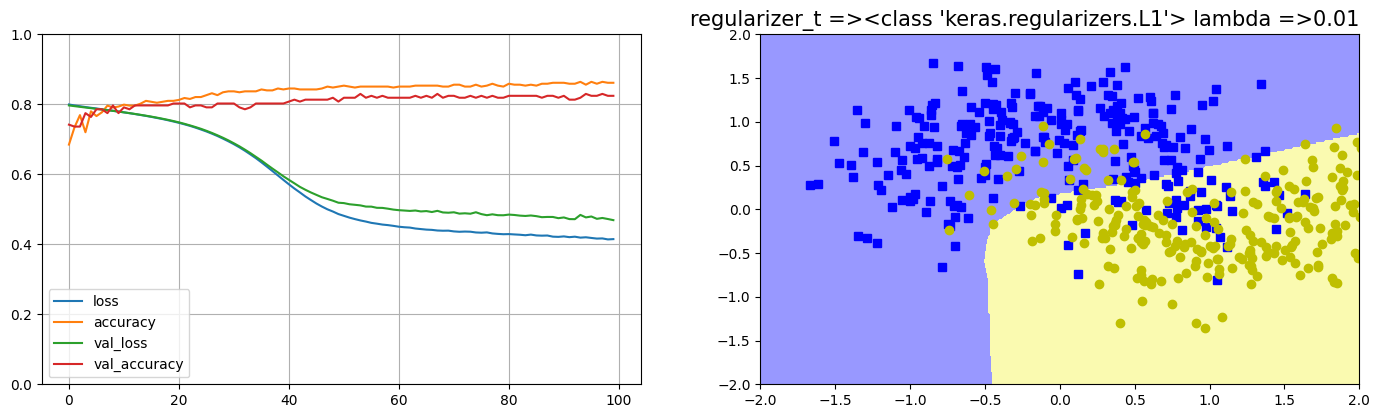

3125/3125 [==============================] - 2s 711us/step


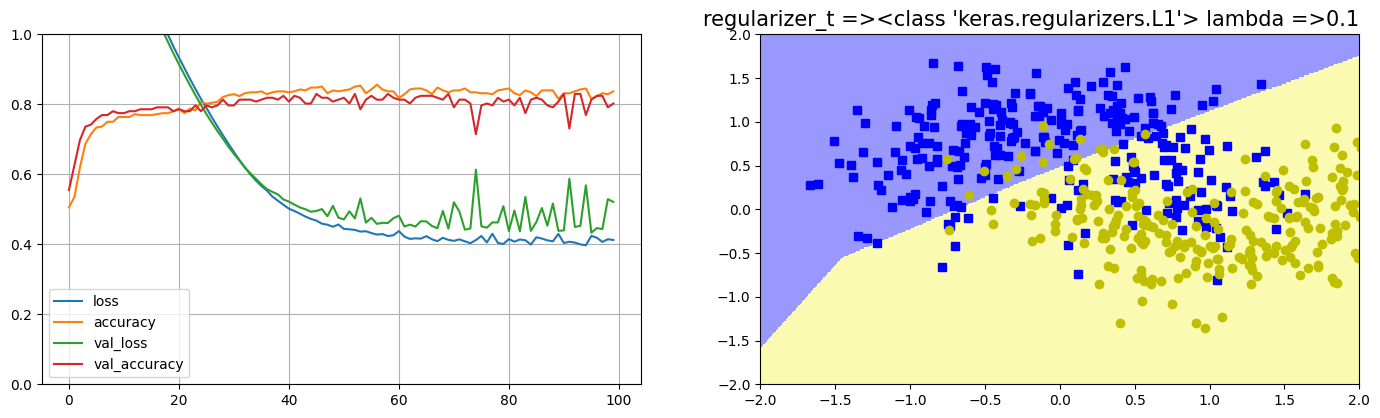

3125/3125 [==============================] - 2s 745us/step


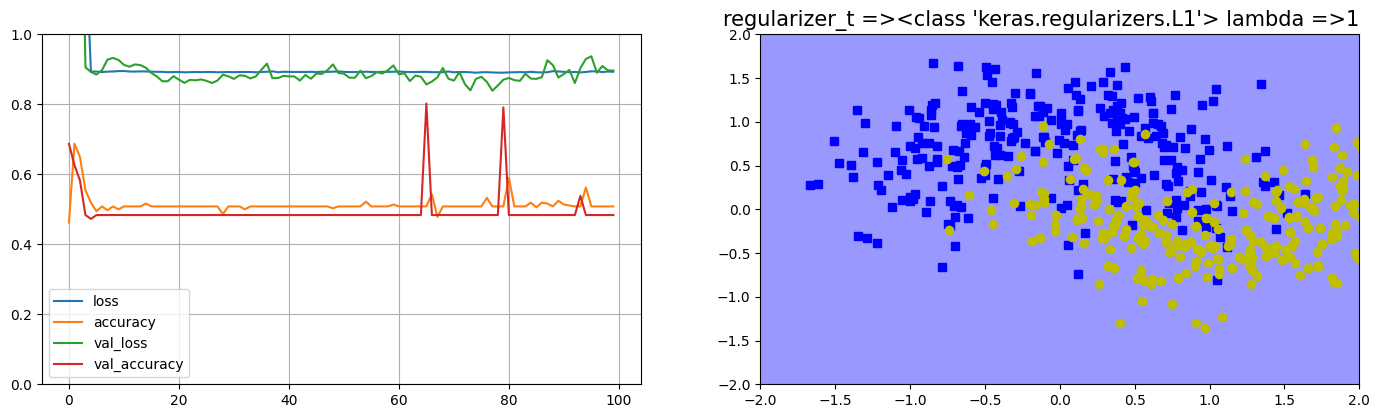

In [19]:
for i in range(5):
    plt.figure(figsize=(17,10))

    regularizer =  l1 #[l1, l1, l2, l2]
    lamda = [0, 0.001,0.01,0.1,1]
    history, model = tune_model(
               dense_layers = 5,
               dense_units =  20 , activation_t = 'relu', batch=32, regularizer_t = regularizer, lamd = lamda[i])

    plt.subplot(2,2,  1)
    plt.plot(pd.DataFrame(history.history), label= history.history.keys())
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.legend()

    plt.subplot(2,2, 2)
    plot_moon(model)
    plt.title(f'regularizer_t =>{regularizer} lambda =>{lamda[i]}', loc='right', fontsize = 15)
    tf.keras.backend.clear_session()
    plt.show()

3125/3125 [==============================] - 2s 731us/step


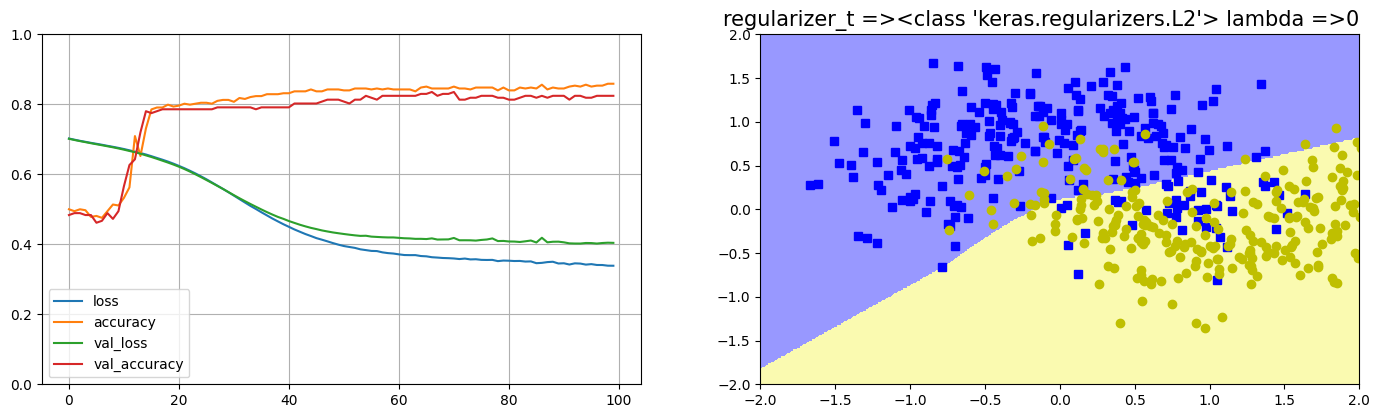

3125/3125 [==============================] - 2s 735us/step


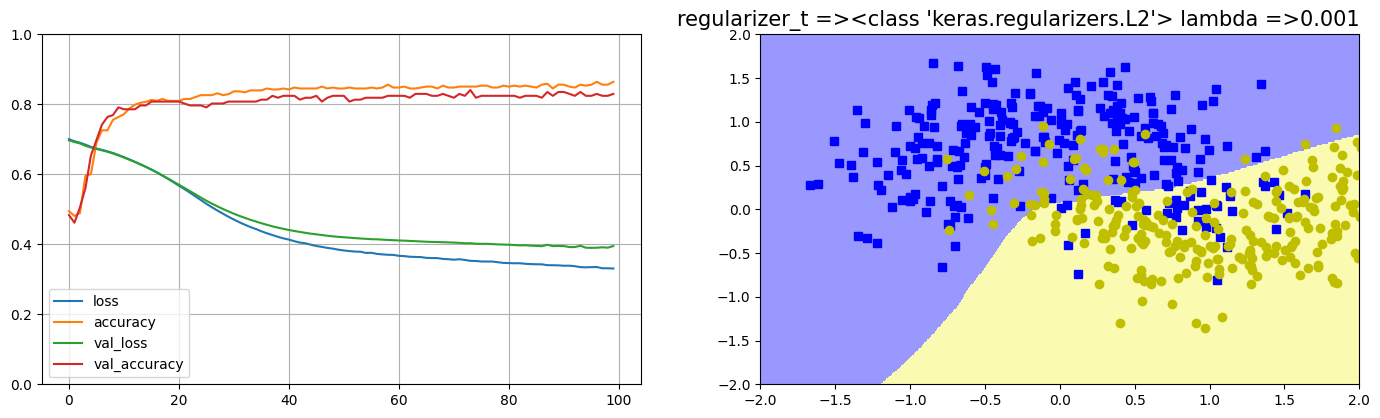

3125/3125 [==============================] - 2s 755us/step


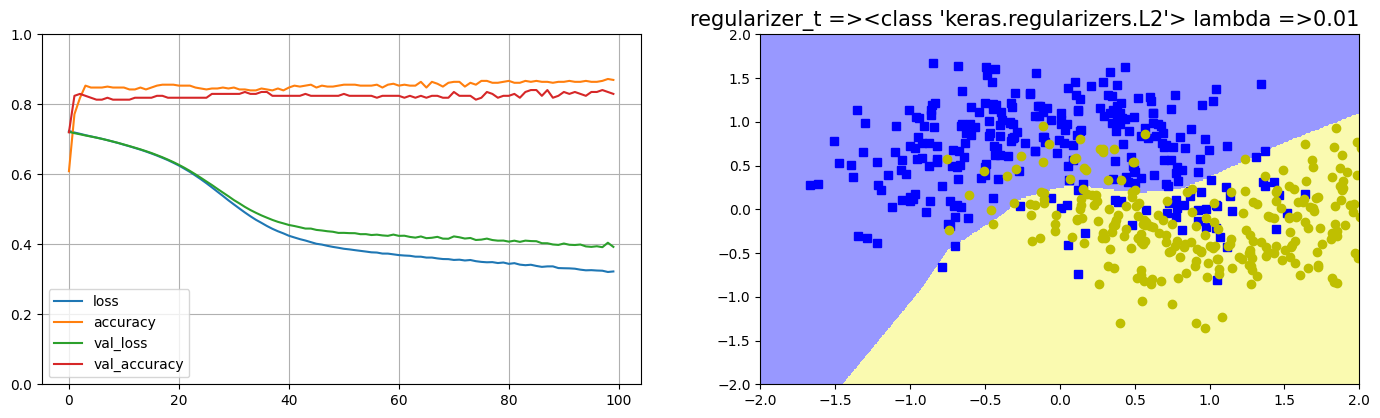

3125/3125 [==============================] - 2s 749us/step


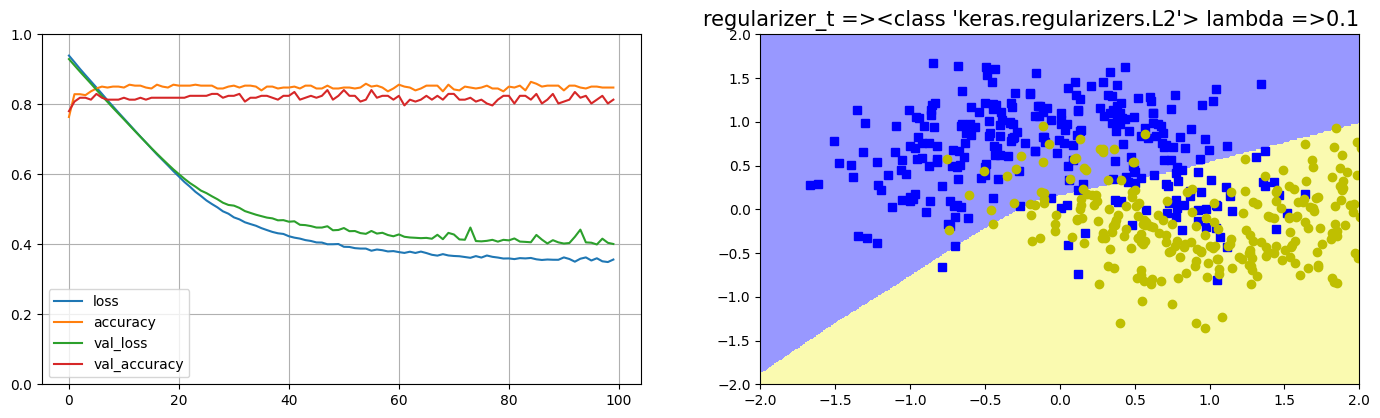

3125/3125 [==============================] - 3s 789us/step


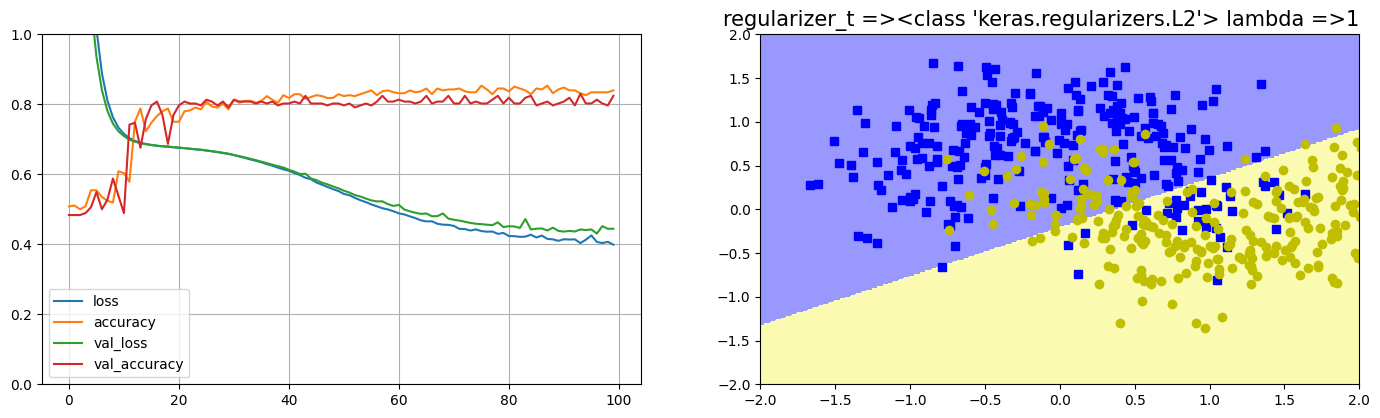

In [20]:
for i in range(5):
    plt.figure(figsize=(17,10))

    regularizer =  l2 #[l1, l1, l2, l2]
    lamda = [0, 0.001,0.01,0.1,1]
    history, model = tune_model(
               dense_layers = 5,
               dense_units =  20 , activation_t = 'relu', batch=32, regularizer_t = regularizer, lamd = lamda[i])

    plt.subplot(2,2,  1)
    plt.plot(pd.DataFrame(history.history), label= history.history.keys())
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.legend()

    plt.subplot(2,2, 2)
    plot_moon(model)
    plt.title(f'regularizer_t =>{regularizer} lambda =>{lamda[i]}', loc='right', fontsize = 15)
    tf.keras.backend.clear_session()
    plt.show()

### we can conclude from the previous that L1 can handle outliers **the yellow points in the blue region** and elminates the weak features ,while L2 could not

### Dropout Regularization

“Dropout” in machine learning refers to the process of randomly ignoring certain nodes in a layer during training.
In the figure below, the neural network on the left represents a typical neural network where all units are activated. On the right, the red units have been dropped out of the model — the values of their weights and biases are not considered during training.

<img src="figures/dropout.png" alt="dropout" style="width: 800px;"/>

When we apply dropout to a neural network, we’re creating a “thinned” network with unique combinations of the units in the hidden layers being dropped randomly at different points in time during training. Each time the gradient of our model is updated, we generate a new thinned neural network with different units dropped based on a probability hyperparameter p. Training a network using dropout can thus be viewed as training loads of different thinned neural networks and merging them into one network that picks up the key properties of each thinned network.
This process allows dropout to reduce the overfitting of models on training data.

<img src="figures/dropout_classification_error.jpeg" alt="dropout_classification_error" style="width: 500px;"/>


#### Inverted Dropout

There are a few ways of implementing dropout. The most common technique is called **inverted dropout**. For the sake of completeness, let's say we want to illustrate this with a neural network of 3 layers. So, in the following code we'll be illustrating how to represent dropout in a single layer. 

```python
keep_prob = 0.8   # 0 <= keep_prob <= 1
l = 3  # this code is only for layer 3
# the generated number that are less than 0.8 will be dropped. 80% stay, 20% dropped
d3 = np.random.rand(a[l].shape[0], a[l].shape[1]) < keep_prob

a3 = np.multiply(a3,d3)   # keep only the values in d3

# increase a3 to not reduce the expected value of output
# (ensures that the expected value of a3 remains the same) - to solve the scaling problem
a3 = a3 / keep_prob       
```

* As you can see at the end of each implementation, we divide each activation by the dropout probability. The ensures that the expected value of the activation remains the same. This make training and testing faster.
* Vector d[3] is used for forward and back propagation and is the same for them, but it is different for each iteration (pass) or training example.
* At test time we don't use dropout. If you implement dropout at test time - it would add noise to predictions.


#### Dropout Intuition

* Dropout randomly knocks out units in your network. So it's as if on every iteration you're working with a smaller NN, and so using a smaller NN seems like it should have a regularizing effect.
* With dropout regularization, you don't rely on any one feature, so have to spread out weights.
* It's possible to show that dropout has a similar effect to L2 regularization.
* Dropout can have different keep_prob per layer.
* The input layer dropout has to be near 1 (or 1 - no dropout) because you don't want to eliminate a lot of features.
* If you're more worried about some layers overfitting than others, you can set a lower keep_prob for some layers than others. The downside is, this gives you even more hyperparameters to search for using cross-validation. One other alternative might be to have some layers where you apply dropout and some layers where you don't apply dropout and then just have one hyperparameter, which is a keep_prob for the layers for which you do apply dropouts.
* A lot of researchers are using dropout with Computer Vision (CV) because they have a very big input size and almost never have enough data, so overfitting is the usual problem. And dropout is a regularization technique to prevent overfitting.
* A downside of dropout is that the cost function J is not well defined and it will be hard to debug (plot J by iteration).
    * To solve that you'll need to turn off dropout, set all the keep_probs to 1, and then run the code and check that it monotonically decreases J and then turn on the dropouts again.

3125/3125 [==============================] - 2s 683us/step


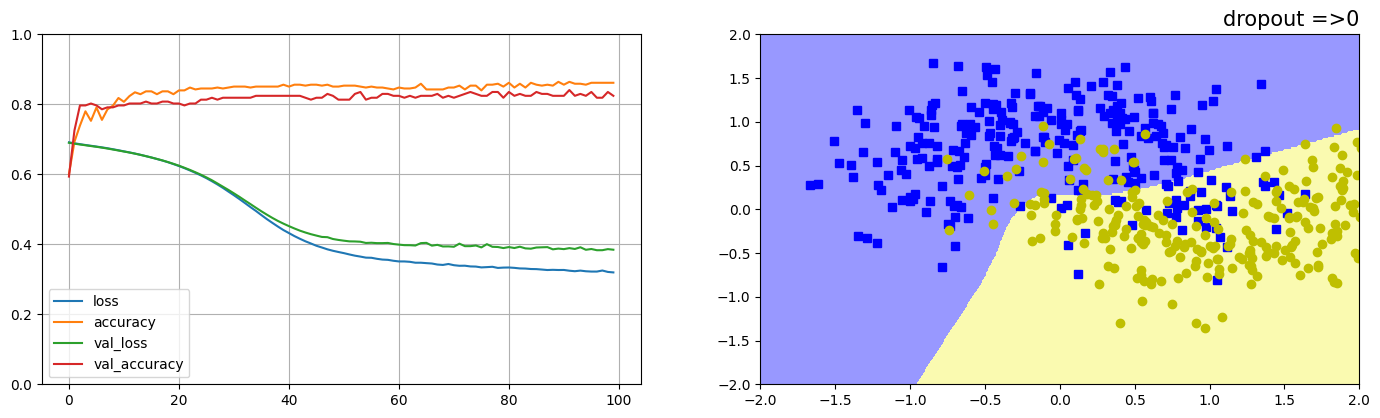

3125/3125 [==============================] - 3s 805us/step


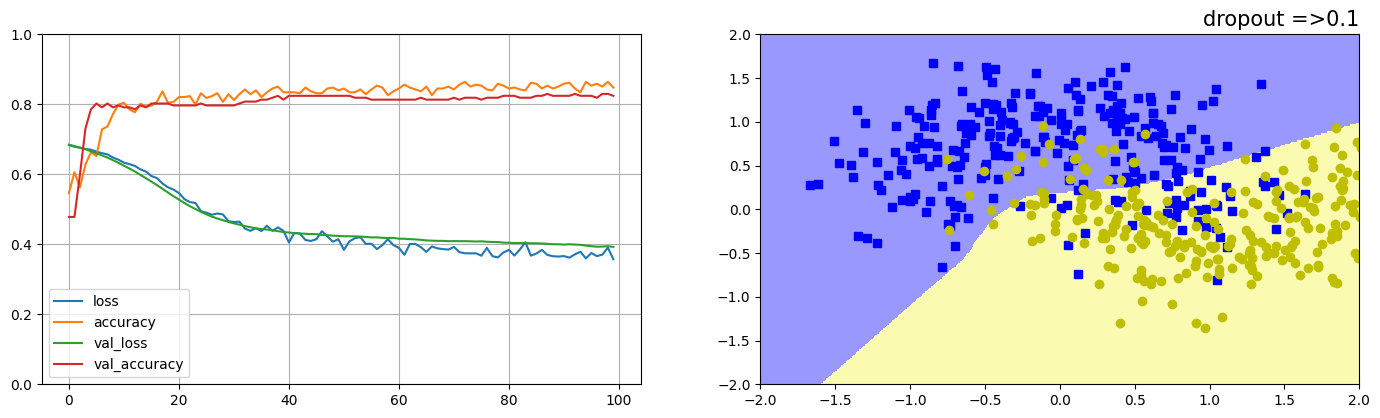

3125/3125 [==============================] - 3s 791us/step


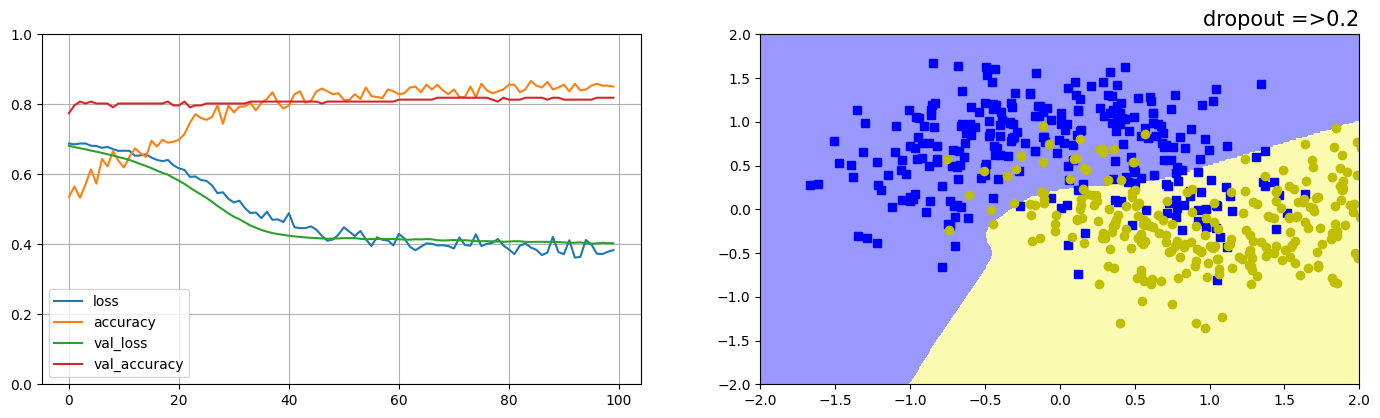

3125/3125 [==============================] - 2s 758us/step


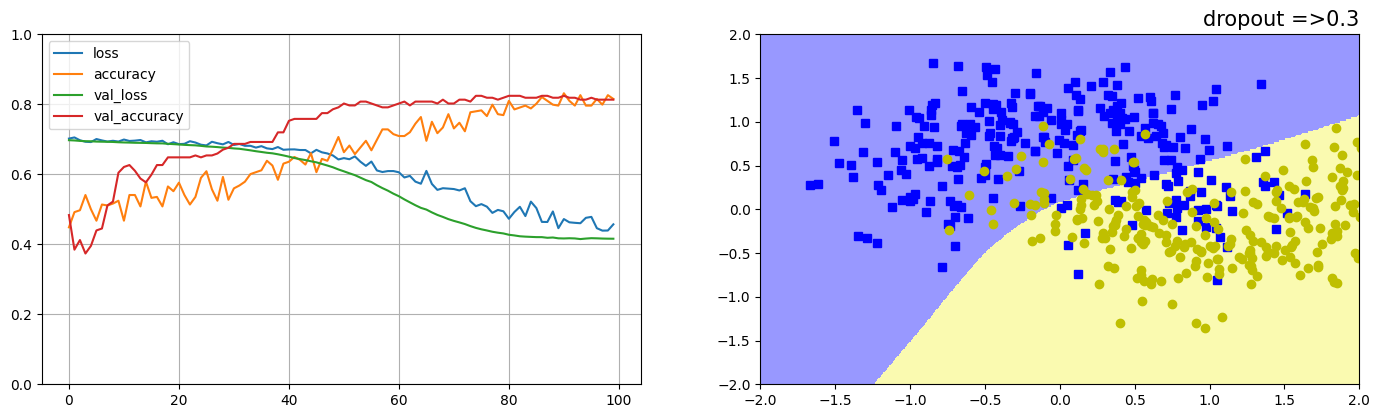

3125/3125 [==============================] - 2s 766us/step


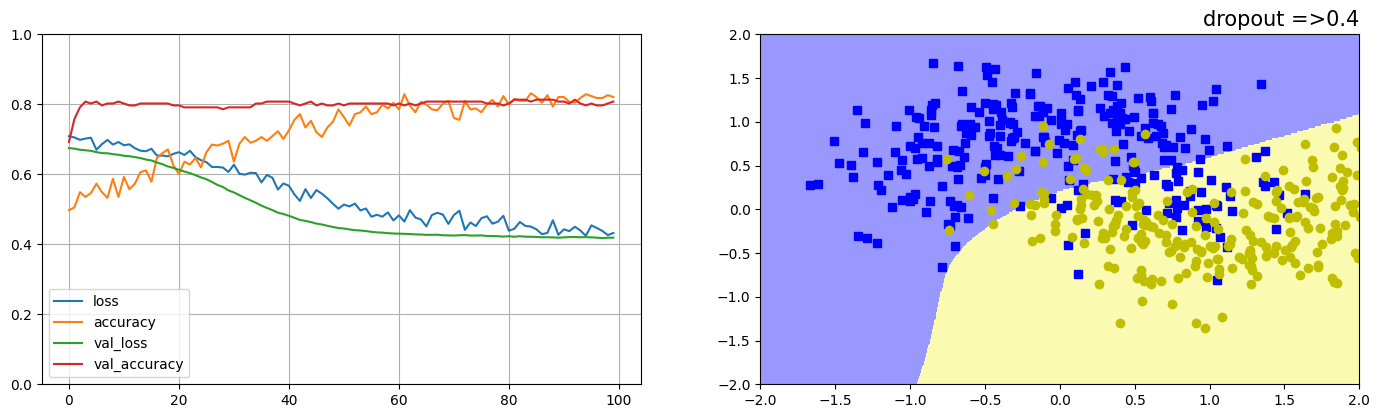

3125/3125 [==============================] - 3s 914us/step


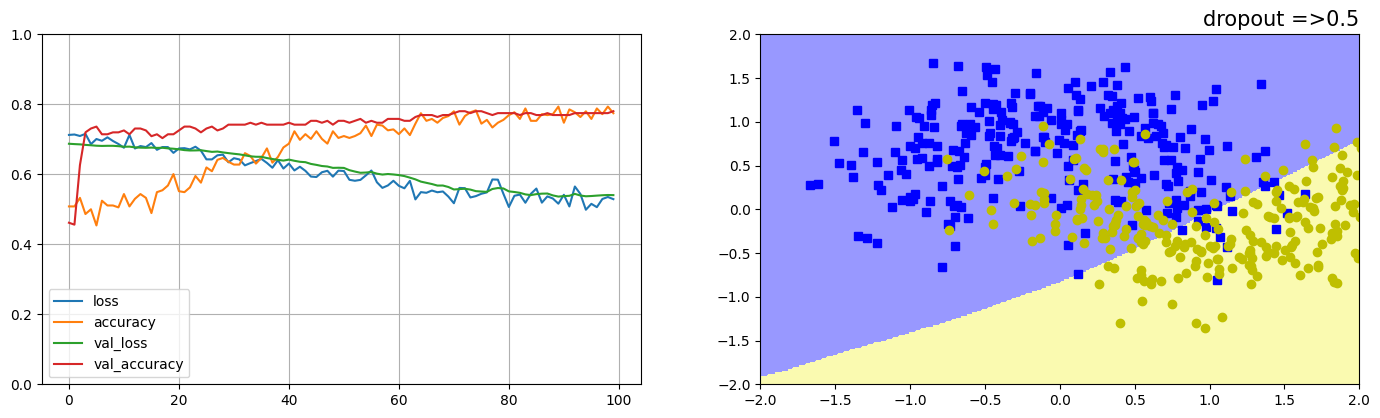

In [21]:
for i in range(6):
    plt.figure(figsize=(17,10))

    drop = [0, 0.1, 0.2, 0.3, 0.4, 0.5]
    history, model = tune_model(
               dense_layers = 5,
               dense_units =  40 , activation_t = 'relu', batch=32, drop = drop[i]) 

    plt.subplot(2,2,  1)
    plt.plot(pd.DataFrame(history.history), label= history.history.keys())
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.legend()

    plt.subplot(2,2, 2)
    plot_moon(model)
    plt.title(f'dropout =>{drop[i]}', loc='right', fontsize = 15)
    tf.keras.backend.clear_session()
    plt.show()

# Normalizing Inputs

Among the best practices for training a Neural Network is to normalize your data to obtain a mean close to 0. Normalizing the data generally speeds up learning and leads to faster convergence. 

* If you normalize your inputs this will speed up the training process a lot.

* Normalization should be applied to training, validation, and testing sets **but using mean and variance of the train set**.

* Why normalize?
    * If we don't normalize the inputs our cost function will be deep and its shape will be inconsistent (elongated) then optimizing it will take a long time.
    * But if we normalize it the opposite will occur. The shape of the cost function will be consistent (look more symmetric like circle in 2D example) and we can use a larger learning rate alpha - the optimization will be faster.
    
<img src="figures/normalization.png" alt="normalization" style="width: 700px;"/>


In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_ms = scaler.fit_transform(X_train_m)
X_test_ms  = scaler.transform(X_test_m)
#X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_moon, y_moon,test_size=0.33, random_state=42)

3125/3125 [==============================] - 9s 3ms/step


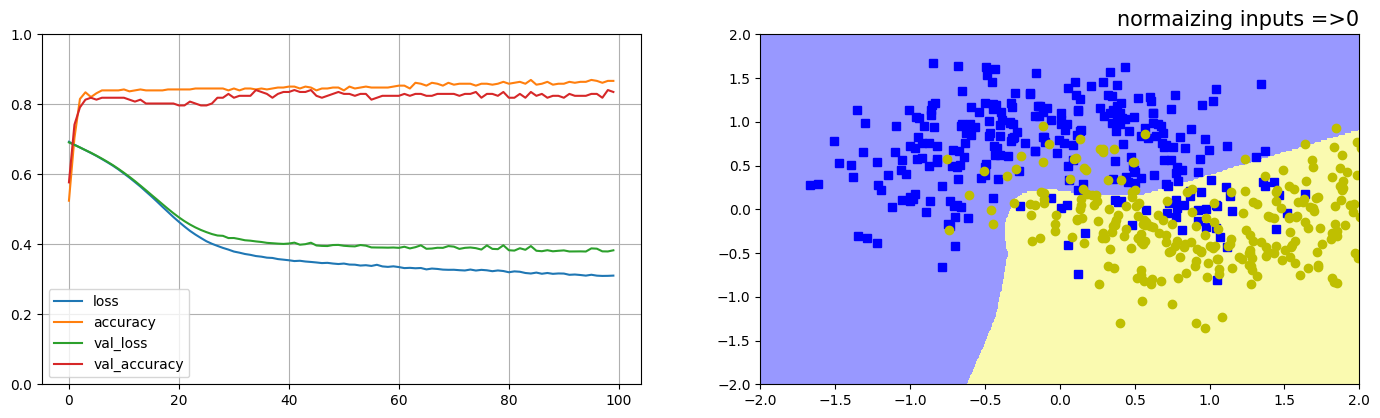

3125/3125 [==============================] - 11s 4ms/step


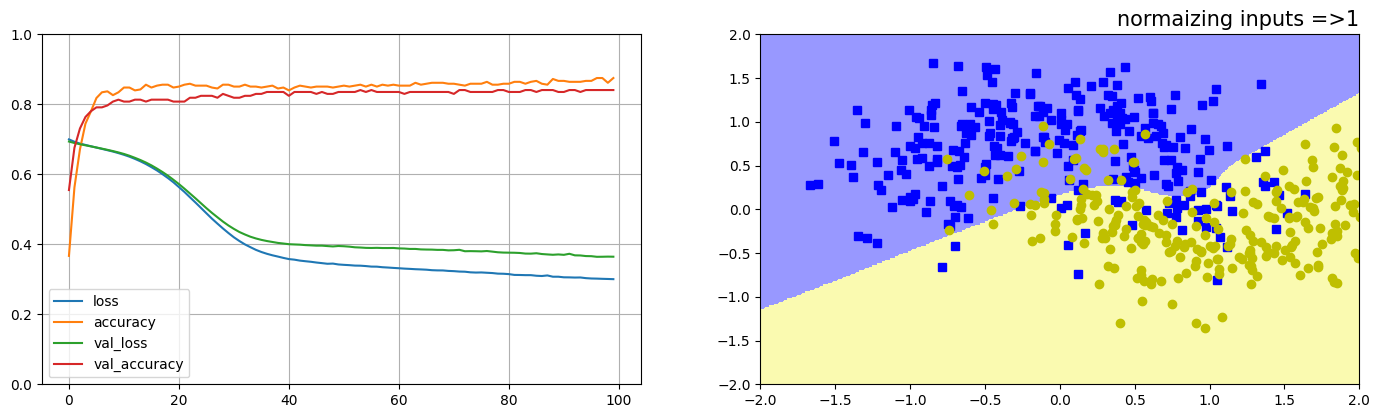

In [42]:
for i in range(2):
    plt.figure(figsize=(17,10))
    if i :
        X_train =    X_train_ms
        X_test  =    X_test_ms
        scal    = scaler
    else:
        X_train =    X_train_m
        X_test  =    X_test_m
        scal    =    None
    
    history, model = tune_model(X_train, X_test,
               dense_layers = 5,
               dense_units =  40 , activation_t = 'relu', batch=32) 

    plt.subplot(2,2,  1)
    plt.plot(pd.DataFrame(history.history), label= history.history.keys())
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.legend()

    plt.subplot(2,2, 2)
    plot_moon(model, scaler = scal)
    plt.title(f'normaizing inputs =>{i}', loc='right', fontsize = 15)
    tf.keras.backend.clear_session()
    plt.show()

# Normalizing Activations

## Normalizing activations in a network

In the rise of deep learning, one of the most important ideas has been an algorithm called **batch normalization**, created by two researchers, Sergey Ioffe and Christian Szegedy. Batch Normalization speeds up learning.

In the previous section, we normalized inputs by subtracting the mean and dividing by variance. This helped a lot for the shape of the cost function and for reaching the minimum point faster. The question is: for any hidden layer can we normalize the activations to train the weights and the biases faster? This is what batch normalization is about.

There are some debates in the deep learning literature about whether we should normalize values before the activation function Z[l] or after applying the activation function A[l]. In practice, normalizing Z[l] is done more often.


### Why does Batch normalization work?

* The first reason is the same reason as why we normalize X.
* The second reason is that batch normalization reduces the problem of input values changing (the problem of covariate shift):

<img src="figures/covariate_shift.png" alt="covariate_shift" style="width: 600px;"/>

* Batch normalization does some regularization:
    * Each mini batch is scaled by the mean/variance computed of that mini-batch.
    * This adds some noise to the values `Z[l]` within that mini batch. So similar to dropout it adds some noise to each hidden layer's activations.
    * This has a slight regularization effect.
    * Using bigger size of the mini-batch you are reducing noise and therefore regularization effect.
    * Don't rely on batch normalization as a regularization. It's intended for normalization of hidden units, activations and therefore speeding up learning. For regularization use other regularization techniques (L2 or dropout).

## Batch normalization at test time

* When we train a NN with Batch normalization, we compute the mean and the variance of the mini-batch.
* In testing we might need to process examples one at a time. The mean and the variance of one example won't make sense.
* We have to compute an estimated value of mean and variance to use it in testing time.
* We can use the weighted average across the mini-batches.
* We will use the estimated values of the mean and variance to test.
* This method is also sometimes called "Running average".
* In practice most often you will use a deep learning framework and it will contain some default implementation of doing such a thing.

# Exploding / Vanishing Gradients

In a network of n hidden layers, n derivatives will be multiplied together. If the derivatives are large then the gradient will increase exponentially as we propagate down the model until they eventually explode, and this is what we call the problem of exploding gradient. Alternatively, if the derivatives are small then the gradient will decrease exponentially as we propagate through the model until it eventually vanishes, and this is the vanishing gradient problem.

In order to explain this phenomenon, let's consider a neural network with $L$ layers, let's say all the activation functions are linear and each bias $b = 0$; we can then write:

```python
Y = W[L]W[L-1].....W[2]W[1]X
```

If we have 2 hidden units per layer and x1 = x2 = 1, we result in:

```python
if W[l] = [1.5   0] 
          [0   1.5] (l != L because of different dimensions in the output layer)
Y = W[L]  [1.5   0]^(L-1) X = 1.5^L 	# which will be very large
          [0   1.5]
```

```python
if W[l] = [0.5   0]
          [0   0.5]
Y = W[L]  [0.5   0]^(L-1) X = 0.5^L 	# which will be very small
          [0   0.5]
```

* The last example explains that the activations (and similarly derivatives) will be decreased/increased exponentially as a function of number of layers.
* So If W > I (Identity matrix) the activation and gradients will explode.
* And If W < I (Identity matrix) the activation and gradients will vanish.

3125/3125 [==============================] - 10s 3ms/step


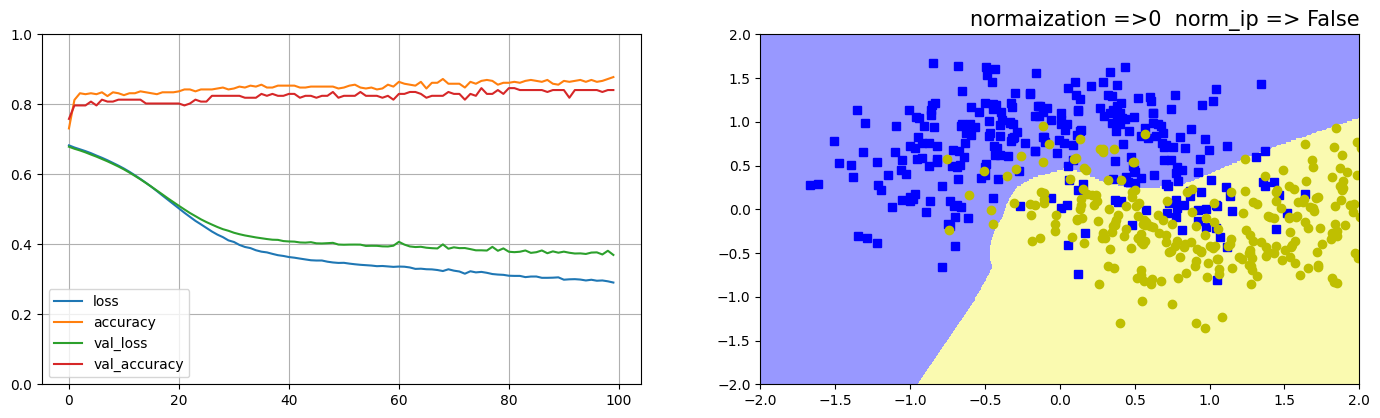

3125/3125 [==============================] - 13s 4ms/step


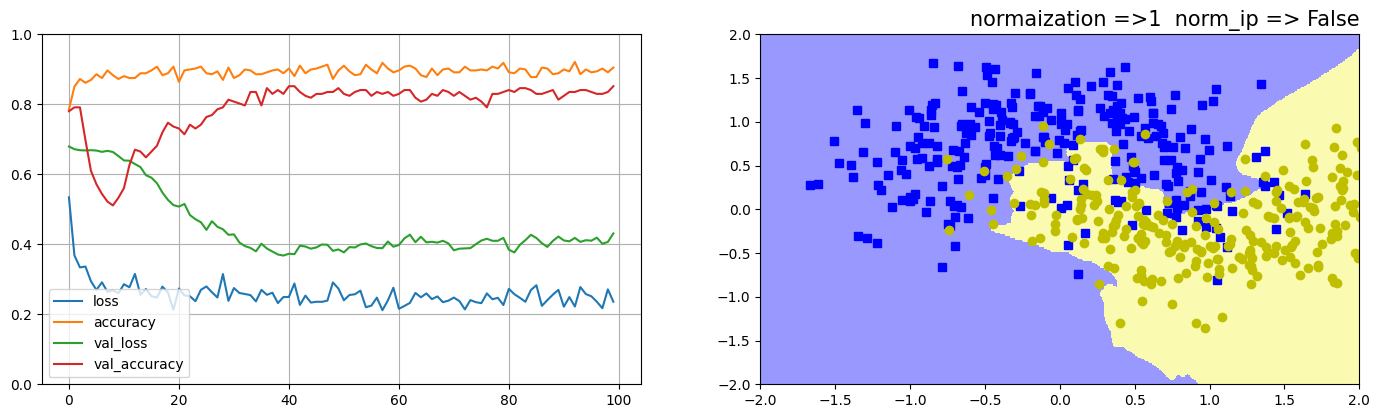

3125/3125 [==============================] - 6s 2ms/step


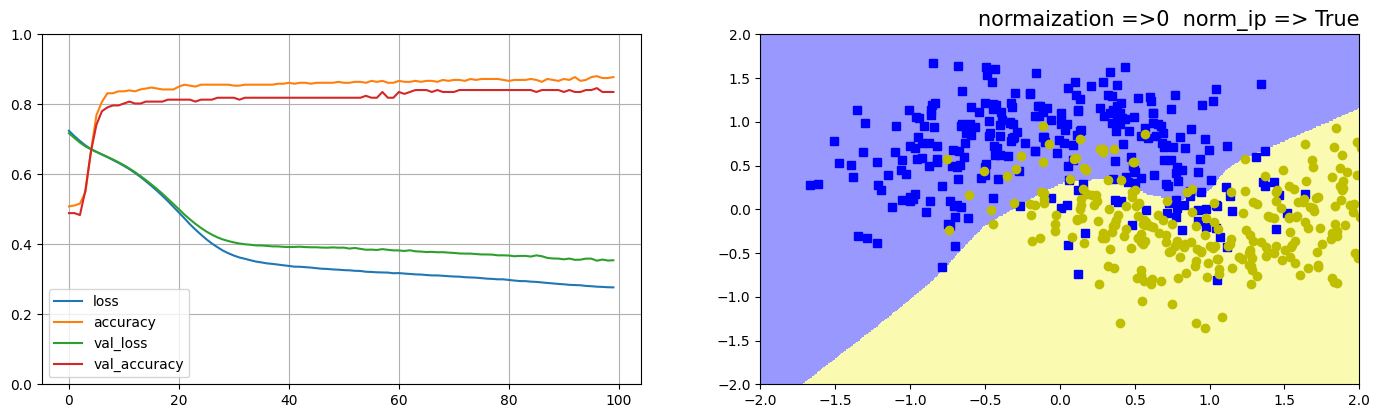

3125/3125 [==============================] - 12s 4ms/step


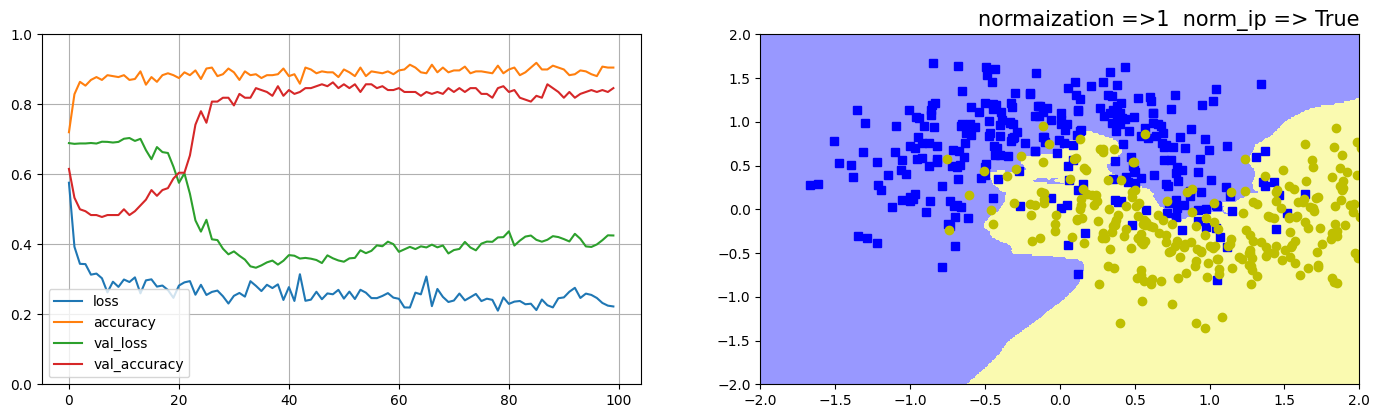

In [44]:
for i in range(4):
    plt.figure(figsize=(17,10))
    if i  > 1:
        X_train =    X_train_ms
        X_test  =    X_test_ms
        scal    = scaler
    else:
        X_train =    X_train_m
        X_test  =    X_test_m
        scal    =    None
    
    history, model = tune_model(X_train, X_test,
               dense_layers = 5,
               dense_units =  40 , activation_t = 'relu', batch=32, norm = (i % 2)) 

    plt.subplot(2,2,  1)
    plt.plot(pd.DataFrame(history.history), label= history.history.keys())
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.legend()

    plt.subplot(2,2, 2)
    plot_moon(model, scaler = scal)
    plt.title(f'normaization =>{(i % 2)}  norm_ip => {i>1}', loc='right', fontsize = 15)
    tf.keras.backend.clear_session()
    plt.show()

## Other regularization methods

### Data augmentation:

Data augmentation in data analysis are techniques used to increase the amount of data by adding slightly modified copies of already existing data or newly created synthetic data from existing data. It acts as a regularizer and helps reduce overfitting when training a machine learning model. 

* Data augmentation examples in a computer vision data:
    * Flipping all your pictures horizontally will give you more data instances.
    * Applying a random position and rotation to an image to get more data.
    * In OCR, you can impose random rotations and distortions to digits/letters.

New data obtained using this technique isn't as good as the real independent data, but still can be used as a regularization technique.

### Early stopping:

In machine learning, early stopping is a form of regularization used to avoid overfitting when training a learner with an iterative method, such as gradient descent. Such methods update the learner so as to make it better fit the training data with each iteration. Up to a point, this improves the learner's performance on data outside of the training set. Past that point, however, improving the learner's fit to the training data comes at the expense of increased generalization error. Early stopping rules provide guidance as to how many iterations can be run before the learner begins to over-fit. Early stopping rules have been employed in many different machine learning methods, with varying amounts of theoretical foundation.

<img src="figures/early_stopping.png" alt="early_stopping" style="width: 500px;"/>

### Model Ensembles

In statistics and machine learning, ensemble methods use multiple learning algorithms to obtain better predictive performance than could be obtained from any of the constituent learning algorithms alone.

* Algorithm:
    * Train multiple independent models.
    * At test time average their results.
* It can get you extra 2% performance.
* It reduces the generalization error.
* You can use some snapshots of your NN at the training ensembles them and take the results.

# Learning curves

Learning curves are often a very useful thing to plot. If either you wanted to sanity check that your algorithm is working correctly, or if you want to improve the performance of the algorithm.

Learning Curve Theory:

* Graph that compares the performance of a model on training and testing data over a varying number of training instances
* We should generally see performance improve as the number of training points increases
* When we separate training and testing sets and graph them individually
    * We can get an idea of how well the model can generalize to new data
* Learning curve allows us to verify when a model has learned as much as it can about the data, when it occurs
    * The performances on the training and testing sets reach a plateau
    * There is a consistent gap between the two error rates
* The key is to find the sweet spot that minimizes bias and variance by finding the right level of model complexity
* Of course with more data any model can improve, and different models may be optimal

Types of learning curves:

* **Bad Learning Curve: High Bias**
    - When training and testing errors converge and are high
    - No matter how much data we feed the model, the model cannot represent the underlying relationship and has high systematic errors
    - Poor fit
    - Poor generalization
* **Bad Learning Curve: High Variance**
    - When there is a large gap between the errors
    - Require data to improve
    - Can simplify the model with fewer or less complex features
* **Ideal Learning Curve**
    - Model that generalizes to new data
    - Testing and training learning curves converge at similar values
    - Smaller the gap, the better our model generalizes
    
    
The following example is a typical case of high variance:

<img src="figures/learning-curve-high-variance.jpg" alt="learning-curve-high-variance" style="width: 500px;"/>

The following diagram is a typical case of high bias.

<img src="figures/learning-curve-high-bias.jpg" alt="learning-curve-high-bias" style="width: 500px;"/>

A learning curve that will help you answer many questions: training dataset size vs. model error.
 
* Do we need more data?
* Do we have a bias problem?
* Do we have a variance problem?
* What's the ideal picture?

Give this a try. It might help you discover a thing or two.


<img src="figures/lc1.jpeg" alt="lc1" style="width: 700px;"/>
<img src="figures/lc2.jpeg" alt="lc2" style="width: 700px;"/>
<img src="figures/lc3.jpeg" alt="lc3" style="width: 700px;"/>
<img src="figures/lc4.jpeg" alt="lc4" style="width: 700px;"/>


# Weights Initialization

It's important for weights to be initialized randomly. This is important to break symmetry and make sure different hidden units can learn different things. If the weights have been initialized to the same values (for example zeros), this will make all consequent neurons to have exactly the same value, leading to the problem of symmetry. It is however okay to initialize the biases $b^{[l]}$ to zeros. Symmetry is still broken so long as $W^{[l]}$ is initialized randomly. One thing to pay attention to though is that different initializations lead to different results.

A partial solution to the Vanishing / Exploding gradients in a neural network is to better or more careful choice of the random initialization of weights. In a single neuron (Perceptron model): $z = w_1x_1 + w_2x_2 + ... + w_nx_n$
So if $n_x$ is large we want the W's to be smaller so that activation do not explode. 

On way to solve this problem is to initialize the weights from a distribution of variance equals to $1/n_x$ to be the range of W's.

One way we can initialize the weight's W's of layer $[l]$ is sampling from a normal distribution of mean 0 and variance $1/n_{[l-1]}$. Where $n_{[l-1]}$ is the number of neurons in  the preceeding layer that participates in the computation of each neuron at layer $[l]$:

```python
np.random.rand(shape) * np.sqrt(1/n[l-1]) # shape is batch size * number of neurons in layer [l]
```

This is known as the "Xavier Initialization", it's mostly used with the tanh activation function. There exist another variation which is preferred when having RELU activation functions. It samples the weight as follows:

```python
np.random.rand(shape) * np.sqrt(2/n[l-1]) # shape is batch size * number of neurons in layer [l]
```

Bengio et al. samples the weights as follow: 


```python
np.random.rand(shape) * np.sqrt(2/(n[l-1] + n[l]))
```